In [94]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import f1_score, precision_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
import sklearn as sk
import matplotlib.pyplot as plt

sk.set_config(display='diagram')

# Functions

# Load Data

In [23]:
df = pd.read_csv('./data/crime-training-data_modified.csv')
df.head(10)

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,target
0,0.0,19.58,0,0.605,7.929,96.2,2.0459,5,403,14.7,3.70,50.0,1
1,0.0,19.58,1,0.871,5.403,100.0,1.3216,5,403,14.7,26.82,13.4,1
2,0.0,18.10,0,0.740,6.485,100.0,1.9784,24,666,20.2,18.85,15.4,1
3,30.0,4.93,0,0.428,6.393,7.8,7.0355,6,300,16.6,5.19,23.7,0
4,0.0,2.46,0,0.488,7.155,92.2,2.7006,3,193,17.8,4.82,37.9,0
5,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,7.67,26.5,0
6,0.0,18.10,0,0.693,5.453,100.0,1.4896,24,666,20.2,30.59,5.0,1
7,0.0,18.10,0,0.693,4.519,100.0,1.6582,24,666,20.2,36.98,7.0,1
8,0.0,5.19,0,0.515,6.316,38.1,6.4584,5,224,20.2,5.68,22.2,0
9,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,315,16.4,9.25,20.9,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   zn       466 non-null    float64
 1   indus    466 non-null    float64
 2   chas     466 non-null    int64  
 3   nox      466 non-null    float64
 4   rm       466 non-null    float64
 5   age      466 non-null    float64
 6   dis      466 non-null    float64
 7   rad      466 non-null    int64  
 8   tax      466 non-null    int64  
 9   ptratio  466 non-null    float64
 10  lstat    466 non-null    float64
 11  medv     466 non-null    float64
 12  target   466 non-null    int64  
dtypes: float64(9), int64(4)
memory usage: 47.5 KB


## Split

In [24]:
X = train_df.drop(['target'], axis=1).values
y = train_df['target']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

In [30]:
print(X_train.shape, y_train.shape)

(326, 12) (326,)


# KNN Model

In [38]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [96]:
knn2 = KNeighborsClassifier()

param_grid = {'n_neighbors':np.arange(1,50)}
knn_cv= GridSearchCV(knn2,param_grid,cv=10)
knn_cv.fit(X,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

## Predict

In [52]:
print(X_test.shape, y_test.shape)

(94, 12) (94,)


In [64]:
y_pred = knn.predict(X_test)

In [54]:
print('Predictions: {}'.format(predictions))

Predictions: [0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0
 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0]


## Performance

In [59]:
knn.score(X_test, y_test)

0.9680851063829787

In [65]:
f1_score(y_test,y_pred)

0.967741935483871

In [88]:
precision_score(y_test, y_pred, average='weighted')

0.96831145314622

In [83]:
#roc_auc_score(y_test, knn.decision_function(X_test))

In [87]:
confusion_matrix(y_test,y_pred)

array([[46,  2],
       [ 1, 45]])

In [89]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,46,2,48
1,1,45,46
All,47,47,94


In [92]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        48
           1       0.96      0.98      0.97        46

    accuracy                           0.97        94
   macro avg       0.97      0.97      0.97        94
weighted avg       0.97      0.97      0.97        94



### ROC Curve

In [77]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [78]:
roc_auc_score(y_test,y_pred_proba)

0.9678442028985507

In [79]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

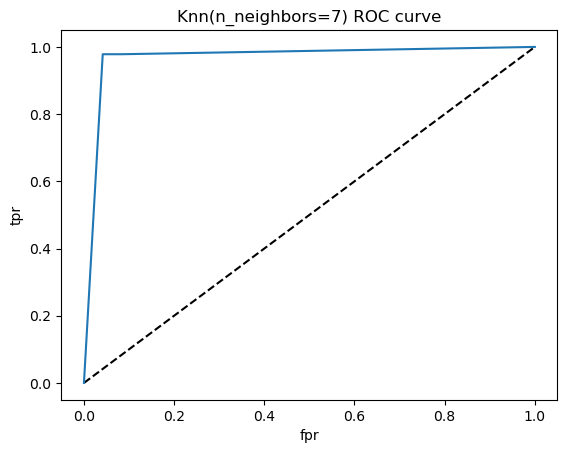

In [80]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

## Model Complexity

In [55]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

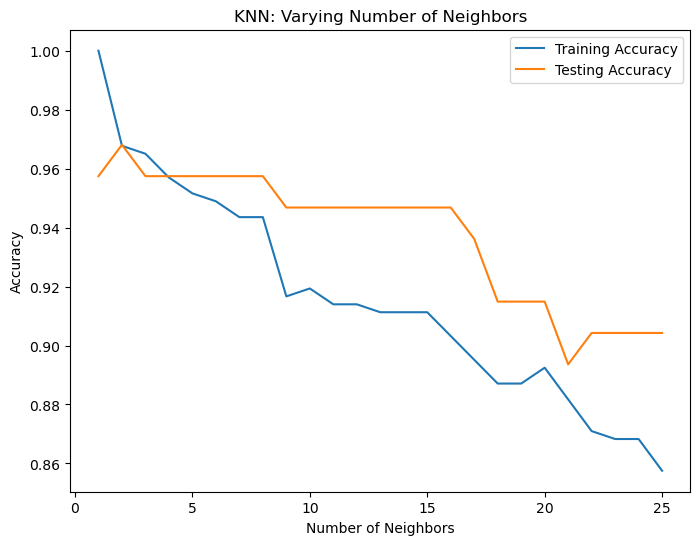

In [56]:
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

## Refined Model

In [57]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [60]:
knn.score(X_test, y_test)

0.9680851063829787

## Final Predict

In [31]:
test_df = pd.read_csv('./data/crime-evaluation-data_modified.csv')
test_df.head(10)

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
1,0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,10.26,18.2
2,0,8.14,0,0.538,6.495,94.4,4.4547,4,307,21.0,12.80,18.4
3,0,8.14,0,0.538,5.950,82.0,3.9900,4,307,21.0,27.71,13.2
4,0,5.96,0,0.499,5.850,41.5,3.9342,5,279,19.2,8.77,21.0
5,25,5.13,0,0.453,5.741,66.2,7.2254,8,284,19.7,13.15,18.7
6,25,5.13,0,0.453,5.966,93.4,6.8185,8,284,19.7,14.44,16.0
7,0,4.49,0,0.449,6.630,56.1,4.4377,3,247,18.5,6.53,26.6
8,0,4.49,0,0.449,6.121,56.8,3.7476,3,247,18.5,8.44,22.2
9,0,2.89,0,0.445,6.163,69.6,3.4952,2,276,18.0,11.34,21.4


In [32]:
X_test = test_df.values

# KNN Pipeline Model

In [11]:
pipe = Pipeline(
    steps = [
        ('sel' , SelectFromModel(
            estimator = KNeighborsClassifier(n_neighbors=15)
        ))
    ]
)

In [12]:
pipe.fit(X, y)

Pipeline(steps=[('sel',
                 SelectFromModel(estimator=KNeighborsClassifier(n_neighbors=15)))])

In [13]:
#predictions_2 = pipe.named_steps.sel.predict(X_test)

In [14]:
X_test.shape

(40, 12)

In [15]:
y_test = np.zeros((40,1))

In [20]:
predictions_2 = pipe.predict(X_test)

AttributeError: 'SelectFromModel' object has no attribute 'predict'

In [18]:
type(predictions_2)

sklearn.pipeline.Pipeline

In [ ]:
pipe.